In [2]:
# Water Management AI - Exploratory Data Analysis
# Notebook 02: Rainfall-Consumption EDA

# Import required libraries
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
from datetime import datetime
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Custom modules
from config import Config
from utils.data_processing import DataProcessor

# Configure settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*60)
print("JUNTA ANALYTICS - EXPLORATORY DATA ANALYSIS")
print("="*60)
print("Notebook 02: Rainfall-Consumption Detailed Analysis")
print("Author: Luis Pillaga")
print(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*60)

JUNTA ANALYTICS - EXPLORATORY DATA ANALYSIS
Notebook 02: Rainfall-Consumption Detailed Analysis
Author: Luis Pillaga
Date: 2025-05-25 10:04:33


In [5]:
#1. Load Processed Data
config = Config()
processed_base_path = "../data/processed/"
# Load the merged dataset from notebook 01
try:
    merged_data_path = os.path.join(processed_base_path, 'merged_rainfall_consumption.csv')
    ml_features_path = os.path.join(processed_base_path, 'ml_features.csv')
    individual_data_path = os.path.join(processed_base_path, 'individual_consumption.csv')
    
    merged_data = pd.read_csv(merged_data_path)
    ml_features = pd.read_csv(ml_features_path)
    individual_data = pd.read_csv(individual_data_path)
    
    # Convert date columns with mixed format handling
    merged_data['period_dt'] = pd.to_datetime(merged_data['period_dt'], format='mixed')
    individual_data['created_at'] = pd.to_datetime(individual_data['created_at'], format='mixed')
    individual_data['period_start'] = pd.to_datetime(individual_data['period_start'], format='mixed')
    
    print("✅ Data loaded successfully")
    print(f"📊 Merged data: {len(merged_data)} periods")
    print(f"📊 ML features: {len(ml_features)} periods") 
    print(f"📊 Individual data: {len(individual_data)} readings")
    
except Exception as e:
    print(f"❌ Error loading data: {e}")
    print("Please run notebook 01 (data integration) first")
    raise

✅ Data loaded successfully
📊 Merged data: 29 periods
📊 ML features: 29 periods
📊 Individual data: 10067 readings


In [6]:
#2. Dataset Overview and Basic Statistics

print(f"\n📊 DATASET OVERVIEW")
print("-" * 40)

# Display basic info
print(f"Merged dataset shape: {merged_data.shape}")
print(f"Date range: {merged_data['period_dt'].min()} to {merged_data['period_dt'].max()}")
print(f"Total time span: {(merged_data['period_dt'].max() - merged_data['period_dt'].min()).days} days")

# Basic statistics
print(f"\n📈 KEY STATISTICS:")
print(f"Average monthly consumption: {merged_data['avg_consumption'].mean():.2f} ± {merged_data['avg_consumption'].std():.2f} m³")
print(f"Average monthly rainfall: {merged_data['avg_rainfall'].mean():.2f} ± {merged_data['avg_rainfall'].std():.2f} mm")
print(f"Correlation coefficient: {merged_data['avg_consumption'].corr(merged_data['avg_rainfall']):.3f}")

# Display first few rows
print(f"\n📋 SAMPLE DATA:")
display_columns = ['period_str', 'avg_consumption', 'avg_rainfall', 'season', 'consumption_category']
print(merged_data[display_columns].head(10))


📊 DATASET OVERVIEW
----------------------------------------
Merged dataset shape: (29, 56)
Date range: 2022-12-01 00:00:00 to 2025-04-01 00:00:00
Total time span: 852 days

📈 KEY STATISTICS:
Average monthly consumption: 10.24 ± 1.01 m³
Average monthly rainfall: 44.70 ± 24.46 mm
Correlation coefficient: -0.220

📋 SAMPLE DATA:
  period_str  avg_consumption  avg_rainfall        season consumption_category
0    2022-12        11.338150     29.381542    Dry Season                 High
1    2023-01         9.540462     54.716906    Dry Season                  Low
2    2023-02         9.724138     75.021647    Dry Season               Medium
3    2023-03        10.921965     86.242920    Dry Season                 High
4    2023-04         8.768786     68.109121  Rainy Season                  Low
5    2023-05         9.052023     43.148393  Rainy Season                  Low
6    2023-06         9.455072     30.856227  Rainy Season                  Low
7    2023-07         9.485465     21.984

In [7]:
#3. Correlation Analysis Deep Dive

print(f"\n🔍 CORRELATION ANALYSIS")
print("-" * 40)

# Calculate various correlation coefficients
correlations = {
    'Pearson': merged_data['avg_consumption'].corr(merged_data['avg_rainfall'], method='pearson'),
    'Spearman': merged_data['avg_consumption'].corr(merged_data['avg_rainfall'], method='spearman'),
    'Kendall': merged_data['avg_consumption'].corr(merged_data['avg_rainfall'], method='kendall')
}

print("Correlation coefficients:")
for method, corr in correlations.items():
    print(f"  {method}: {corr:.4f}")

# Statistical significance test
from scipy.stats import pearsonr
stat, p_value = pearsonr(merged_data['avg_consumption'], merged_data['avg_rainfall'])
print(f"\nStatistical significance:")
print(f"  P-value: {p_value:.6f}")
print(f"  Significant at α=0.05: {'Yes' if p_value < 0.05 else 'No'}")


🔍 CORRELATION ANALYSIS
----------------------------------------
Correlation coefficients:
  Pearson: -0.2195
  Spearman: -0.2293
  Kendall: -0.1317

Statistical significance:
  P-value: 0.252513
  Significant at α=0.05: No


In [8]:
#4. Seasonal Pattern Analysis

print(f"\n🗓️  SEASONAL PATTERN ANALYSIS")
print("-" * 40)

# Monthly patterns
monthly_stats = merged_data.groupby('month').agg({
    'avg_consumption': ['mean', 'std'],
    'avg_rainfall': ['mean', 'std'],
    'rainfall_consumption_ratio': 'mean'
}).round(2)

print("Monthly patterns:")
print(monthly_stats)

# Seasonal statistics
seasonal_stats = merged_data.groupby('season').agg({
    'avg_consumption': ['mean', 'std', 'min', 'max'],
    'avg_rainfall': ['mean', 'std', 'min', 'max']
}).round(2)

print(f"\nSeasonal statistics:")
print(seasonal_stats)



🗓️  SEASONAL PATTERN ANALYSIS
----------------------------------------
Monthly patterns:
      avg_consumption       avg_rainfall      rainfall_consumption_ratio
                 mean   std         mean  std                       mean
month                                                                   
1               10.17  1.01        54.72  0.0                       4.93
2                9.90  0.23        75.02  0.0                       6.88
3               10.26  1.00        86.24  0.0                       7.70
4                9.97  1.29        68.11  0.0                       6.26
5                9.67  0.88        43.15  0.0                       4.06
6                8.99  0.65        30.86  0.0                       3.09
7               10.32  1.18        21.98  0.0                       1.95
8               10.96  2.10        16.92  0.0                       1.44
9               10.66  0.38        19.19  0.0                       1.65
10              11.41  1.24       

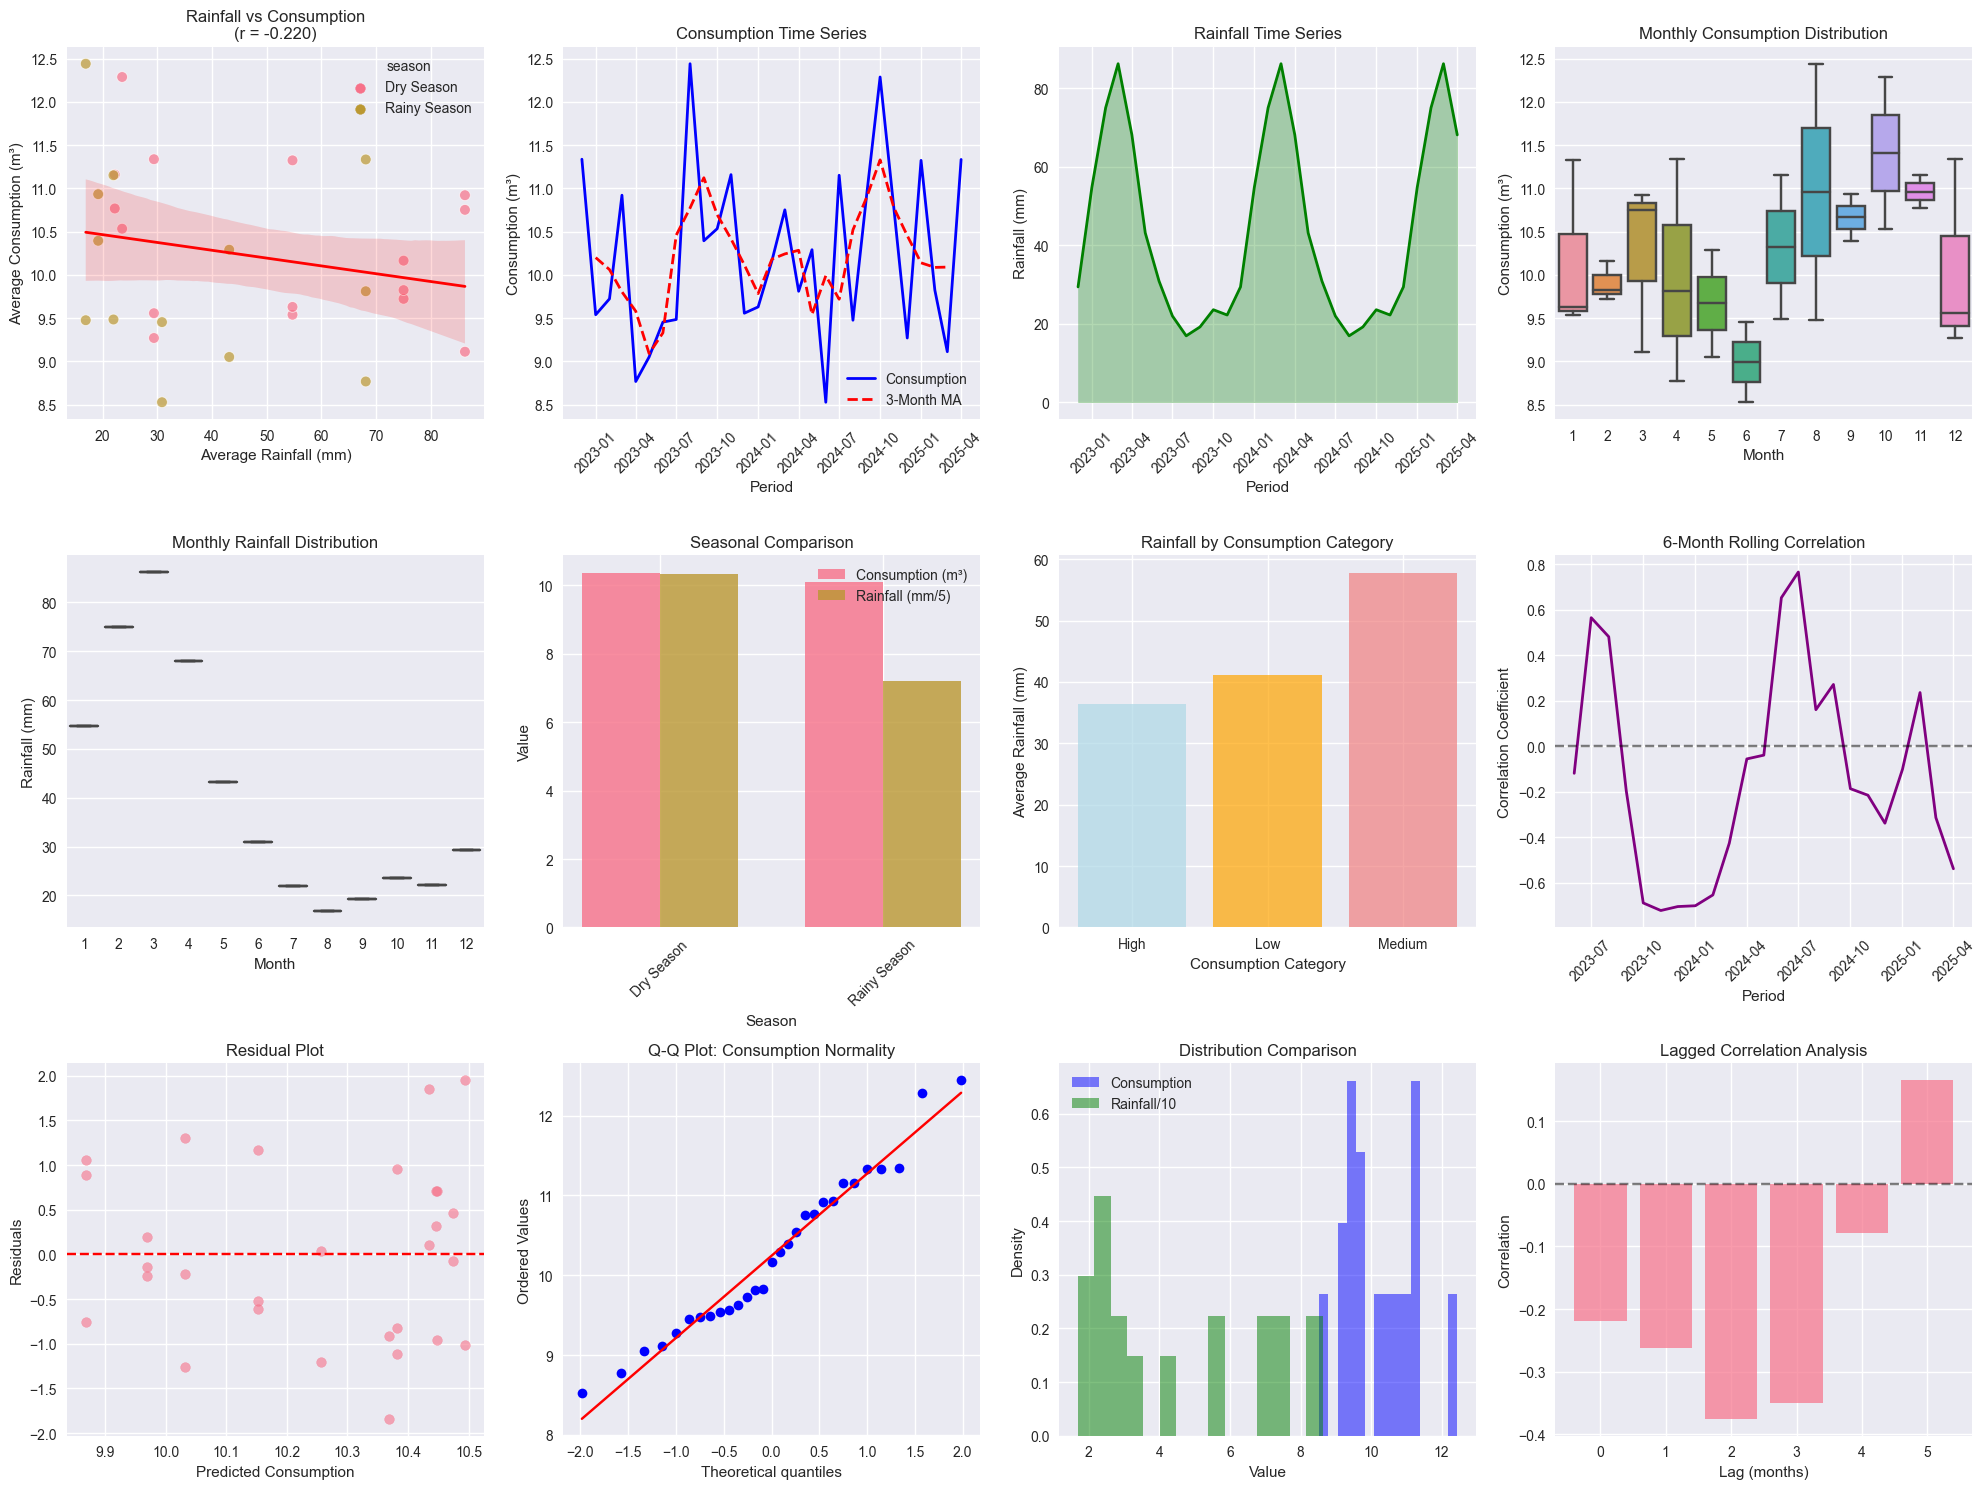

In [16]:
# Primero, preparar los datos necesarios
# Usar rfh_mean como avg_rainfall si no existe
if 'avg_rainfall' not in merged_data.columns:
    merged_data['avg_rainfall'] = merged_data['rfh_mean']

# Crear moving average si no existe
if 'consumption_ma_3' not in merged_data.columns:
    merged_data_sorted = merged_data.sort_values('period_dt')
    merged_data['consumption_ma_3'] = merged_data_sorted['avg_consumption'].rolling(window=3, center=True).mean()

# Calcular correlaciones
correlations = {
    'Pearson': merged_data['avg_rainfall'].corr(merged_data['avg_consumption'])
}

# ## 5. Advanced Visualizations
fig = plt.figure(figsize=(20, 15))

# 1. Correlation scatter with regression
plt.subplot(3, 4, 1)
sns.scatterplot(data=merged_data, x='avg_rainfall', y='avg_consumption', 
                hue='season', s=60, alpha=0.7)
sns.regplot(data=merged_data, x='avg_rainfall', y='avg_consumption', 
            scatter=False, color='red', line_kws={'linewidth': 2})
plt.title(f'Rainfall vs Consumption\n(r = {correlations["Pearson"]:.3f})')
plt.xlabel('Average Rainfall (mm)')
plt.ylabel('Average Consumption (m³)')

# 2. Time series decomposition
plt.subplot(3, 4, 2)
plt.plot(merged_data['period_dt'], merged_data['avg_consumption'], 'b-', label='Consumption', linewidth=2)
plt.plot(merged_data['period_dt'], merged_data['consumption_ma_3'], 'r--', label='3-Month MA', linewidth=2)
plt.title('Consumption Time Series')
plt.xlabel('Period')
plt.ylabel('Consumption (m³)')
plt.legend()
plt.xticks(rotation=45)

# 3. Rainfall time series
plt.subplot(3, 4, 3)
plt.plot(merged_data['period_dt'], merged_data['avg_rainfall'], 'g-', linewidth=2)
plt.fill_between(merged_data['period_dt'], merged_data['avg_rainfall'], alpha=0.3, color='green')
plt.title('Rainfall Time Series')
plt.xlabel('Period')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)

# 4. Monthly boxplots - Consumption
plt.subplot(3, 4, 4)
sns.boxplot(data=merged_data, x='month', y='avg_consumption')
plt.title('Monthly Consumption Distribution')
plt.xlabel('Month')
plt.ylabel('Consumption (m³)')

# 5. Monthly boxplots - Rainfall
plt.subplot(3, 4, 5)
sns.boxplot(data=merged_data, x='month', y='avg_rainfall')
plt.title('Monthly Rainfall Distribution')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')

# 6. Seasonal comparison
plt.subplot(3, 4, 6)
seasonal_data = merged_data.groupby('season')[['avg_consumption', 'avg_rainfall']].mean()
x = np.arange(len(seasonal_data.index))
width = 0.35
plt.bar(x - width/2, seasonal_data['avg_consumption'], width, label='Consumption (m³)', alpha=0.8)
plt.bar(x + width/2, seasonal_data['avg_rainfall']/5, width, label='Rainfall (mm/5)', alpha=0.8)
plt.xlabel('Season')
plt.ylabel('Value')
plt.title('Seasonal Comparison')
plt.xticks(x, seasonal_data.index, rotation=45)
plt.legend()

# 7. Consumption categories vs rainfall
plt.subplot(3, 4, 7)
category_rainfall = merged_data.groupby('consumption_category')['avg_rainfall'].mean()
plt.bar(category_rainfall.index, category_rainfall.values, alpha=0.7, color=['lightblue', 'orange', 'lightcoral'])
plt.title('Rainfall by Consumption Category')
plt.xlabel('Consumption Category')
plt.ylabel('Average Rainfall (mm)')

# 8. Rolling correlation - CORREGIDO
plt.subplot(3, 4, 8)
merged_data_sorted = merged_data.sort_values('period_dt')
# Calcular correlación rolling manualmente para evitar problemas de MultiIndex
rolling_corr_values = []
rolling_dates = []
window_size = 6

for i in range(window_size, len(merged_data_sorted)):
    window_data = merged_data_sorted.iloc[i-window_size:i]
    corr = window_data['avg_consumption'].corr(window_data['avg_rainfall'])
    if not pd.isna(corr):  # Solo agregar si la correlación es válida
        rolling_corr_values.append(corr)
        rolling_dates.append(merged_data_sorted.iloc[i]['period_dt'])

plt.plot(rolling_dates, rolling_corr_values, linewidth=2, color='purple')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('6-Month Rolling Correlation')
plt.xlabel('Period')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)

# 9. Residual analysis
plt.subplot(3, 4, 9)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = merged_data[['avg_rainfall']].values
y = merged_data['avg_consumption'].values
lr.fit(X, y)
predictions = lr.predict(X)
residuals = y - predictions

plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Consumption')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# 10. QQ plot for consumption normality
plt.subplot(3, 4, 10)
from scipy import stats
stats.probplot(merged_data['avg_consumption'], dist="norm", plot=plt)
plt.title('Q-Q Plot: Consumption Normality')

# 11. Distribution comparison
plt.subplot(3, 4, 11)
plt.hist(merged_data['avg_consumption'], bins=15, alpha=0.5, label='Consumption', density=True, color='blue')
plt.hist(merged_data['avg_rainfall']/10, bins=15, alpha=0.5, label='Rainfall/10', density=True, color='green')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Comparison')
plt.legend()

# 12. Lag analysis
plt.subplot(3, 4, 12)
merged_data_sorted = merged_data.sort_values('period_dt')
lag_correlations = []
for lag in range(0, 6):
    if lag == 0:
        corr = merged_data_sorted['avg_consumption'].corr(merged_data_sorted['avg_rainfall'])
    else:
        corr = merged_data_sorted['avg_consumption'].corr(merged_data_sorted['avg_rainfall'].shift(lag))
    lag_correlations.append(corr if not pd.isna(corr) else 0)

plt.bar(range(6), lag_correlations, alpha=0.7)
plt.xlabel('Lag (months)')
plt.ylabel('Correlation')
plt.title('Lagged Correlation Analysis')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [18]:
#6. Statistical Tests and Analysis

print(f"\n📊 STATISTICAL TESTS")
print("-" * 40)

# Test for normality
from scipy.stats import shapiro, jarque_bera, kstest

def test_normality(data, name):
    """Test data for normality using multiple tests"""
    print(f"\nNormality tests for {name}:")
    
    # Shapiro-Wilk test
    if len(data) <= 5000:  # Shapiro-Wilk works best for smaller samples
        stat, p = shapiro(data)
        print(f"  Shapiro-Wilk: statistic={stat:.4f}, p-value={p:.6f}")
    
    # Jarque-Bera test
    stat, p = jarque_bera(data)
    print(f"  Jarque-Bera: statistic={stat:.4f}, p-value={p:.6f}")
    
    # Kolmogorov-Smirnov test
    stat, p = kstest(data, 'norm')
    print(f"  KS test: statistic={stat:.4f}, p-value={p:.6f}")

test_normality(merged_data['avg_consumption'], 'Consumption')
test_normality(merged_data['avg_rainfall'], 'Rainfall')

# Test for stationarity
from statsmodels.tsa.stattools import adfuller

def test_stationarity(data, name):
    """Test for stationarity using Augmented Dickey-Fuller test"""
    result = adfuller(data.dropna())
    print(f"\nStationarity test for {name}:")
    print(f"  ADF Statistic: {result[0]:.4f}")
    print(f"  p-value: {result[1]:.6f}")
    print(f"  Critical Values:")
    for key, value in result[4].items():
        print(f"    {key}: {value:.3f}")
    
    if result[1] <= 0.05:
        print("  Result: Series is stationary")
    else:
        print("  Result: Series is non-stationary")

test_stationarity(merged_data['avg_consumption'], 'Consumption')
test_stationarity(merged_data['avg_rainfall'], 'Rainfall')

# Variance analysis
print(f"\n📊 VARIANCE ANALYSIS:")
print(f"Consumption CV: {merged_data['avg_consumption'].std() / merged_data['avg_consumption'].mean() * 100:.1f}%")
print(f"Rainfall CV: {merged_data['avg_rainfall'].std() / merged_data['avg_rainfall'].mean() * 100:.1f}%")



📊 STATISTICAL TESTS
----------------------------------------

Normality tests for Consumption:
  Shapiro-Wilk: statistic=0.9617, p-value=0.360776
  Jarque-Bera: statistic=1.1222, p-value=0.570588
  KS test: statistic=1.0000, p-value=0.000000

Normality tests for Rainfall:
  Shapiro-Wilk: statistic=0.8637, p-value=0.001473
  Jarque-Bera: statistic=3.1507, p-value=0.206938
  KS test: statistic=1.0000, p-value=0.000000

Stationarity test for Consumption:
  ADF Statistic: -3.1953
  p-value: 0.020259
  Critical Values:
    1%: -3.833
    5%: -3.031
    10%: -2.656
  Result: Series is stationary

Stationarity test for Rainfall:
  ADF Statistic: -9.3718
  p-value: 0.000000
  Critical Values:
    1%: -3.833
    5%: -3.031
    10%: -2.656
  Result: Series is stationary

📊 VARIANCE ANALYSIS:
Consumption CV: 9.8%
Rainfall CV: 54.7%


In [19]:
#7. Individual Consumption Patterns Analysis

print(f"\n👥 INDIVIDUAL CONSUMPTION ANALYSIS")
print("-" * 40)

# Analyze individual meter patterns
meter_stats = individual_data.groupby('water_meter_id').agg({
    'total_consumed': ['count', 'mean', 'std', 'min', 'max'],
    'neighborhood_id': 'first'
}).round(2)

meter_stats.columns = ['reading_count', 'avg_consumption', 'std_consumption', 
                      'min_consumption', 'max_consumption', 'neighborhood']

print(f"Individual meter statistics:")
print(f"  Total unique meters: {len(meter_stats)}")
print(f"  Average readings per meter: {meter_stats['reading_count'].mean():.1f}")
print(f"  Consumption range: {meter_stats['avg_consumption'].min():.1f} - {meter_stats['avg_consumption'].max():.1f} m³")

# Top consumers
top_consumers = meter_stats.nlargest(10, 'avg_consumption')
print(f"\nTop 10 consumers:")
print(top_consumers[['avg_consumption', 'std_consumption', 'neighborhood']])

# Neighborhood analysis
neighborhood_stats = individual_data.groupby('neighborhood_name').agg({
    'total_consumed': ['count', 'mean', 'std'],
    'water_meter_id': 'nunique'
}).round(2)

neighborhood_stats.columns = ['total_readings', 'avg_consumption', 'std_consumption', 'unique_meters']

print(f"\nNeighborhood analysis:")
print(neighborhood_stats)


👥 INDIVIDUAL CONSUMPTION ANALYSIS
----------------------------------------
Individual meter statistics:
  Total unique meters: 362
  Average readings per meter: 27.8
  Consumption range: 0.0 - 88.0 m³

Top 10 consumers:
                avg_consumption  std_consumption neighborhood
water_meter_id                                               
1054                      88.00              NaN           JB
1050                      63.25            19.82            C
530                       44.24            10.55           JB
503                       41.38             7.88            L
599                       39.86            22.06            C
471                       37.76            28.96            E
1051                      37.75            30.87            C
579                       36.07             8.54            L
607                       34.97             8.27            C
433                       33.76            12.19            L

Neighborhood analysis:
           

In [20]:
#8. Outlier Detection and Analysis

print(f"\n🎯 OUTLIER DETECTION")
print("-" * 40)

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in merged data
consumption_outliers, c_lower, c_upper = detect_outliers_iqr(merged_data, 'avg_consumption')
rainfall_outliers, r_lower, r_upper = detect_outliers_iqr(merged_data, 'avg_rainfall')

print(f"Consumption outliers: {len(consumption_outliers)} ({len(consumption_outliers)/len(merged_data)*100:.1f}%)")
print(f"  Bounds: {c_lower:.1f} - {c_upper:.1f} m³")

print(f"Rainfall outliers: {len(rainfall_outliers)} ({len(rainfall_outliers)/len(merged_data)*100:.1f}%)")
print(f"  Bounds: {r_lower:.1f} - {r_upper:.1f} mm")

if len(consumption_outliers) > 0:
    print(f"\nConsumption outlier periods:")
    print(consumption_outliers[['period_str', 'avg_consumption', 'avg_rainfall', 'season']])

# Detect outliers in individual data
individual_outliers, i_lower, i_upper = detect_outliers_iqr(individual_data, 'total_consumed')
print(f"\nIndividual consumption outliers: {len(individual_outliers)} ({len(individual_outliers)/len(individual_data)*100:.1f}%)")
print(f"  Bounds: {i_lower:.1f} - {i_upper:.1f} m³")


🎯 OUTLIER DETECTION
----------------------------------------
Consumption outliers: 0 (0.0%)
  Bounds: 7.3 - 13.1 m³
Rainfall outliers: 0 (0.0%)
  Bounds: -46.6 - 136.9 mm

Individual consumption outliers: 278 (2.8%)
  Bounds: -20.0 - 36.0 m³



🔍 PRINCIPAL COMPONENT ANALYSIS
----------------------------------------
Using features for PCA: ['avg_consumption', 'avg_rainfall', 'consumption_ma_3', 'rainfall_ma_3', 'consumption_growth', 'rainfall_change', 'month_sin', 'month_cos']
Explained variance ratio:
  PC1: 0.409 (40.9%)
  PC2: 0.276 (27.6%)
  PC3: 0.195 (19.5%)
  PC4: 0.076 (7.6%)
  PC5: 0.024 (2.4%)
  PC6: 0.014 (1.4%)
  PC7: 0.004 (0.4%)
  PC8: 0.002 (0.2%)
Cumulative explained variance:
  PC1-PC1: 0.409 (40.9%)
  PC1-PC2: 0.684 (68.4%)
  PC1-PC3: 0.879 (87.9%)
  PC1-PC4: 0.955 (95.5%)
  PC1-PC5: 0.980 (98.0%)


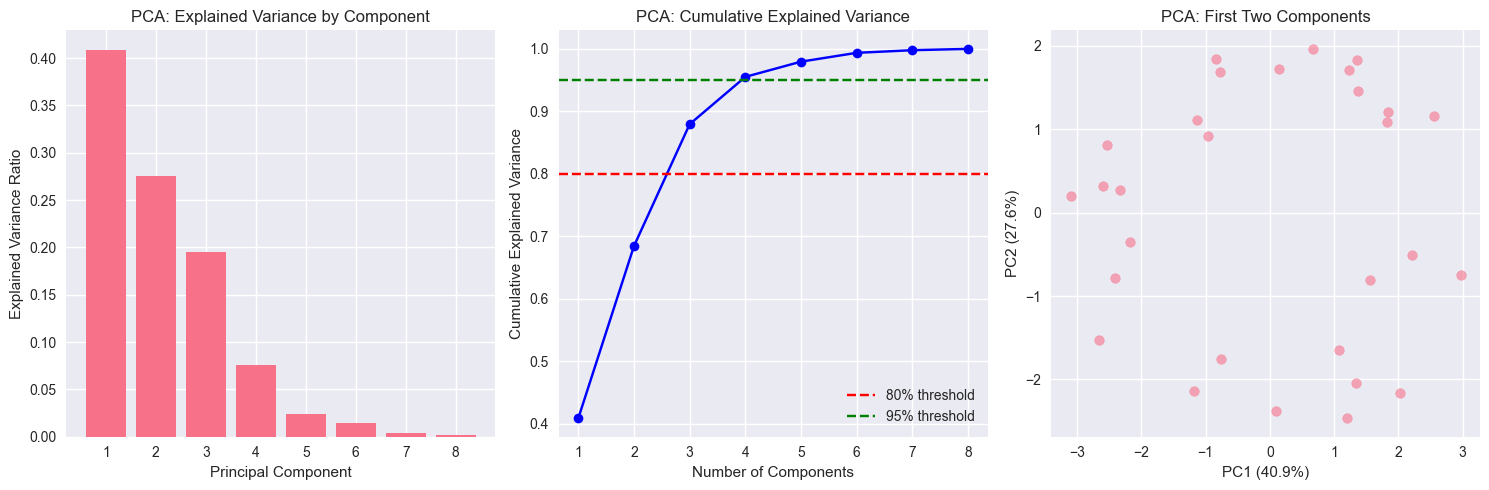


Feature loadings on first two components:
                      PC1    PC2
avg_consumption    -0.329  0.076
avg_rainfall        0.441  0.326
consumption_ma_3   -0.373  0.306
rainfall_ma_3       0.508  0.041
consumption_growth -0.114 -0.145
rainfall_change    -0.081  0.587
month_sin           0.486  0.269
month_cos          -0.211  0.596


In [21]:
#9. Principal Component Analysis

print(f"\n🔍 PRINCIPAL COMPONENT ANALYSIS")
print("-" * 40)

# Select numerical features for PCA
pca_features = ['avg_consumption', 'avg_rainfall', 'consumption_ma_3', 'rainfall_ma_3',
               'consumption_growth', 'rainfall_change', 'month_sin', 'month_cos']

# Ensure features exist
available_features = [f for f in pca_features if f in ml_features.columns]
print(f"Using features for PCA: {available_features}")

if len(available_features) >= 2:
    # Prepare data for PCA
    pca_data = ml_features[available_features].fillna(0)
    
    # Standardize the features
    scaler = StandardScaler()
    pca_scaled = scaler.fit_transform(pca_data)
    
    # Perform PCA
    pca = PCA()
    pca_result = pca.fit_transform(pca_scaled)
    
    # Print explained variance
    print(f"Explained variance ratio:")
    for i, var in enumerate(pca.explained_variance_ratio_):
        print(f"  PC{i+1}: {var:.3f} ({var*100:.1f}%)")
    
    print(f"Cumulative explained variance:")
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    for i, var in enumerate(cumsum[:5]):  # First 5 components
        print(f"  PC1-PC{i+1}: {var:.3f} ({var*100:.1f}%)")
    
    # Plot PCA results
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('PCA: Explained Variance by Component')
    
    plt.subplot(1, 3, 2)
    plt.plot(range(1, len(cumsum)+1), cumsum, 'bo-')
    plt.axhline(y=0.8, color='r', linestyle='--', label='80% threshold')
    plt.axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA: Cumulative Explained Variance')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    plt.title('PCA: First Two Components')
    
    plt.tight_layout()
    plt.show()
    
    # Feature importance in first two components
    feature_importance = pd.DataFrame(
        pca.components_[:2].T,
        columns=['PC1', 'PC2'],
        index=available_features
    )
    
    print(f"\nFeature loadings on first two components:")
    print(feature_importance.round(3))

else:
    print("Insufficient features available for PCA")



🌐 COMPREHENSIVE CORRELATION ANALYSIS
----------------------------------------


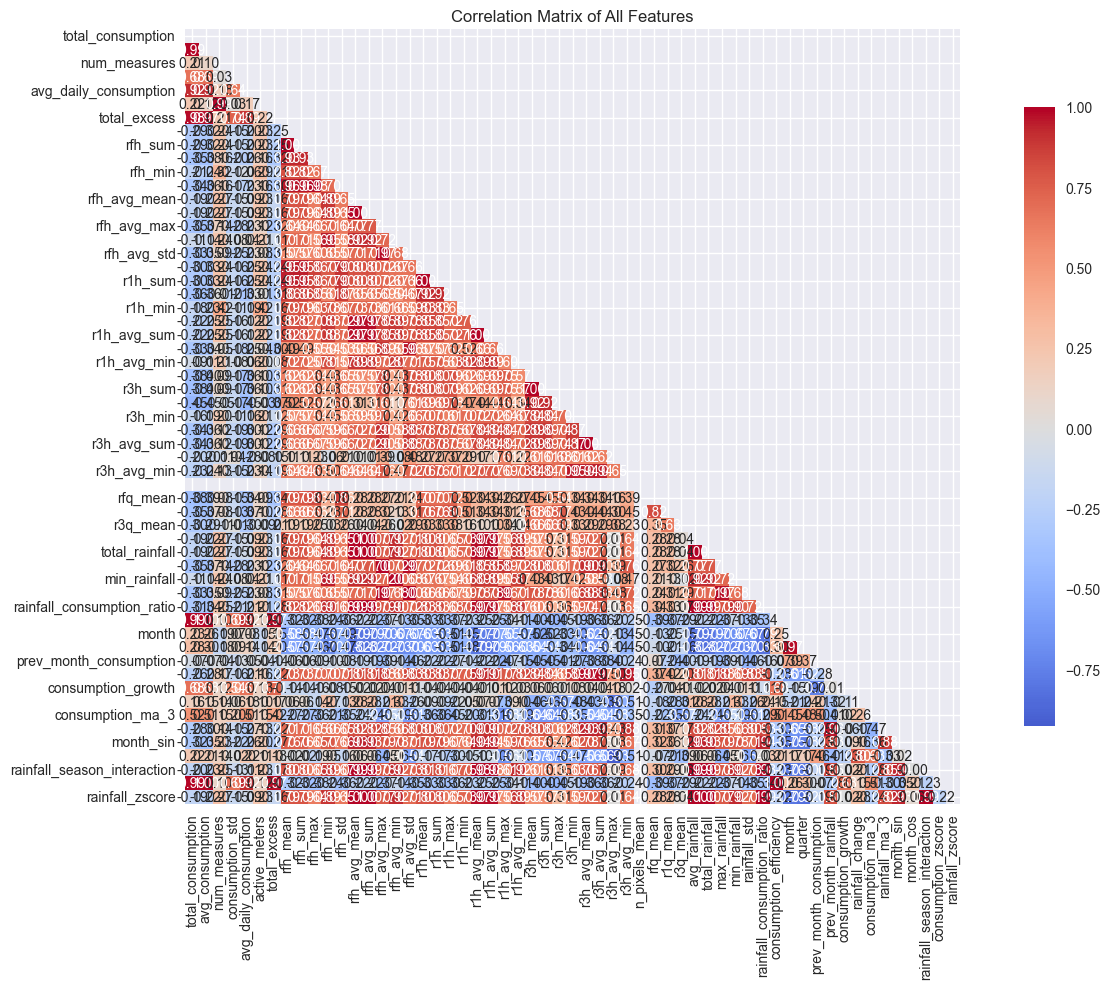

Highly correlated feature pairs (|r| > 0.7):
  total_consumption - avg_consumption: 0.995
  total_consumption - avg_daily_consumption: 0.925
  total_consumption - total_excess: 0.981
  total_consumption - consumption_efficiency: 0.995
  total_consumption - consumption_zscore: 0.995
  avg_consumption - avg_daily_consumption: 0.921
  avg_consumption - total_excess: 0.974
  avg_consumption - consumption_efficiency: 1.000
  avg_consumption - consumption_zscore: 1.000
  num_measures - active_meters: 0.993
  consumption_std - total_excess: 0.741
  avg_daily_consumption - total_excess: 0.890
  avg_daily_consumption - consumption_efficiency: 0.923
  avg_daily_consumption - consumption_zscore: 0.921
  total_excess - consumption_efficiency: 0.975
  total_excess - consumption_growth: 0.710
  total_excess - consumption_zscore: 0.974
  rfh_mean - rfh_sum: 1.000
  rfh_mean - rfh_max: 0.928
  rfh_mean - rfh_min: 0.817
  rfh_mean - rfh_std: 0.957
  rfh_mean - rfh_avg_mean: 0.792
  rfh_mean - rfh_avg_s

In [22]:
#10. Correlation Matrix of All Features

print(f"\n🌐 COMPREHENSIVE CORRELATION ANALYSIS")
print("-" * 40)

# Create correlation matrix for all numerical features
numerical_features = ml_features.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = ml_features[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # High correlation threshold
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

print(f"Highly correlated feature pairs (|r| > 0.7):")
for feat1, feat2, corr in high_corr_pairs:
    print(f"  {feat1} - {feat2}: {corr:.3f}")

In [23]:
#11. Summary and Key Insights

print(f"\n📋 KEY INSIGHTS SUMMARY")
print("=" * 40)

# Calculate key insights
correlation_strength = abs(correlations['Pearson'])
if correlation_strength < 0.1:
    corr_interpretation = "Very weak"
elif correlation_strength < 0.3:
    corr_interpretation = "Weak"
elif correlation_strength < 0.5:
    corr_interpretation = "Moderate"
elif correlation_strength < 0.7:
    corr_interpretation = "Strong"
else:
    corr_interpretation = "Very strong"

print(f"🔍 CORRELATION INSIGHTS:")
print(f"  • Rainfall-consumption correlation: {correlations['Pearson']:.3f} ({corr_interpretation})")
print(f"  • Statistical significance: {'Significant' if p_value < 0.05 else 'Not significant'} (p={p_value:.6f})")

print(f"\n📊 TEMPORAL PATTERNS:")
print(f"  • Highest consumption month: {monthly_stats.loc[monthly_stats[('avg_consumption', 'mean')].idxmax()].name}")
print(f"  • Lowest consumption month: {monthly_stats.loc[monthly_stats[('avg_consumption', 'mean')].idxmin()].name}")
print(f"  • Highest rainfall month: {monthly_stats.loc[monthly_stats[('avg_rainfall', 'mean')].idxmax()].name}")
print(f"  • Lowest rainfall month: {monthly_stats.loc[monthly_stats[('avg_rainfall', 'mean')].idxmin()].name}")

print(f"\n🏘️  SPATIAL PATTERNS:")
if len(neighborhood_stats) > 0:
    highest_consumption_neighborhood = neighborhood_stats.loc[neighborhood_stats['avg_consumption'].idxmax()]
    lowest_consumption_neighborhood = neighborhood_stats.loc[neighborhood_stats['avg_consumption'].idxmin()]
    print(f"  • Highest consumption neighborhood: {highest_consumption_neighborhood.name}")
    print(f"  • Lowest consumption neighborhood: {lowest_consumption_neighborhood.name}")

print(f"\n📈 DATA QUALITY:")
print(f"  • Consumption outliers: {len(consumption_outliers)/len(merged_data)*100:.1f}%")
print(f"  • Rainfall outliers: {len(rainfall_outliers)/len(merged_data)*100:.1f}%")
print(f"  • Individual consumption outliers: {len(individual_outliers)/len(individual_data)*100:.1f}%")

print(f"\n🎯 MODELING RECOMMENDATIONS:")
if abs(correlations['Pearson']) > 0.3:
    print("  • Strong enough correlation for predictive modeling")
else:
    print("  • Weak correlation - consider additional features")

if len(available_features) >= 2:
    components_for_80_percent = np.where(cumsum >= 0.8)[0][0] + 1
    print(f"  • {components_for_80_percent} components explain 80% of variance")

print(f"  • Seasonal patterns detected - include temporal features")
if len(high_corr_pairs) > 0:
    print(f"  • {len(high_corr_pairs)} highly correlated feature pairs - consider feature selection")

print(f"\n✅ EDA COMPLETED SUCCESSFULLY!")


📋 KEY INSIGHTS SUMMARY
🔍 CORRELATION INSIGHTS:
  • Rainfall-consumption correlation: -0.220 (Weak)
  • Statistical significance: Not significant (p=0.252513)

📊 TEMPORAL PATTERNS:
  • Highest consumption month: 10
  • Lowest consumption month: 6
  • Highest rainfall month: 3
  • Lowest rainfall month: 8

🏘️  SPATIAL PATTERNS:
  • Highest consumption neighborhood: La Loma
  • Lowest consumption neighborhood: La Dolorosa

📈 DATA QUALITY:
  • Consumption outliers: 0.0%
  • Rainfall outliers: 0.0%
  • Individual consumption outliers: 2.8%

🎯 MODELING RECOMMENDATIONS:
  • Weak correlation - consider additional features
  • 3 components explain 80% of variance
  • Seasonal patterns detected - include temporal features
  • 462 highly correlated feature pairs - consider feature selection

✅ EDA COMPLETED SUCCESSFULLY!
